In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
office= pd.read_csv('/content/income.multiple_linear_regression_dataset.csv')
office

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


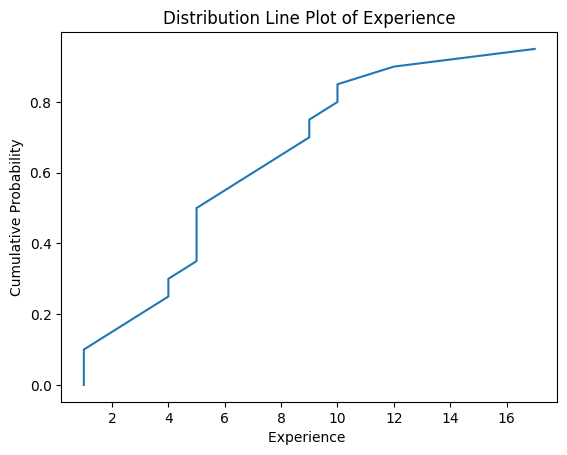

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the income values
experience_sorted = np.sort(office['experience'])

# Calculate the cumulative distribution
cumulative_prob = np.arange(len(experience_sorted)) / float(len(experience_sorted))

# Create the line plot
plt.plot(experience_sorted, cumulative_prob)
plt.xlabel("Experience ")
plt.ylabel("Cumulative Probability")
plt.title("Distribution Line Plot of Experience")
plt.show()

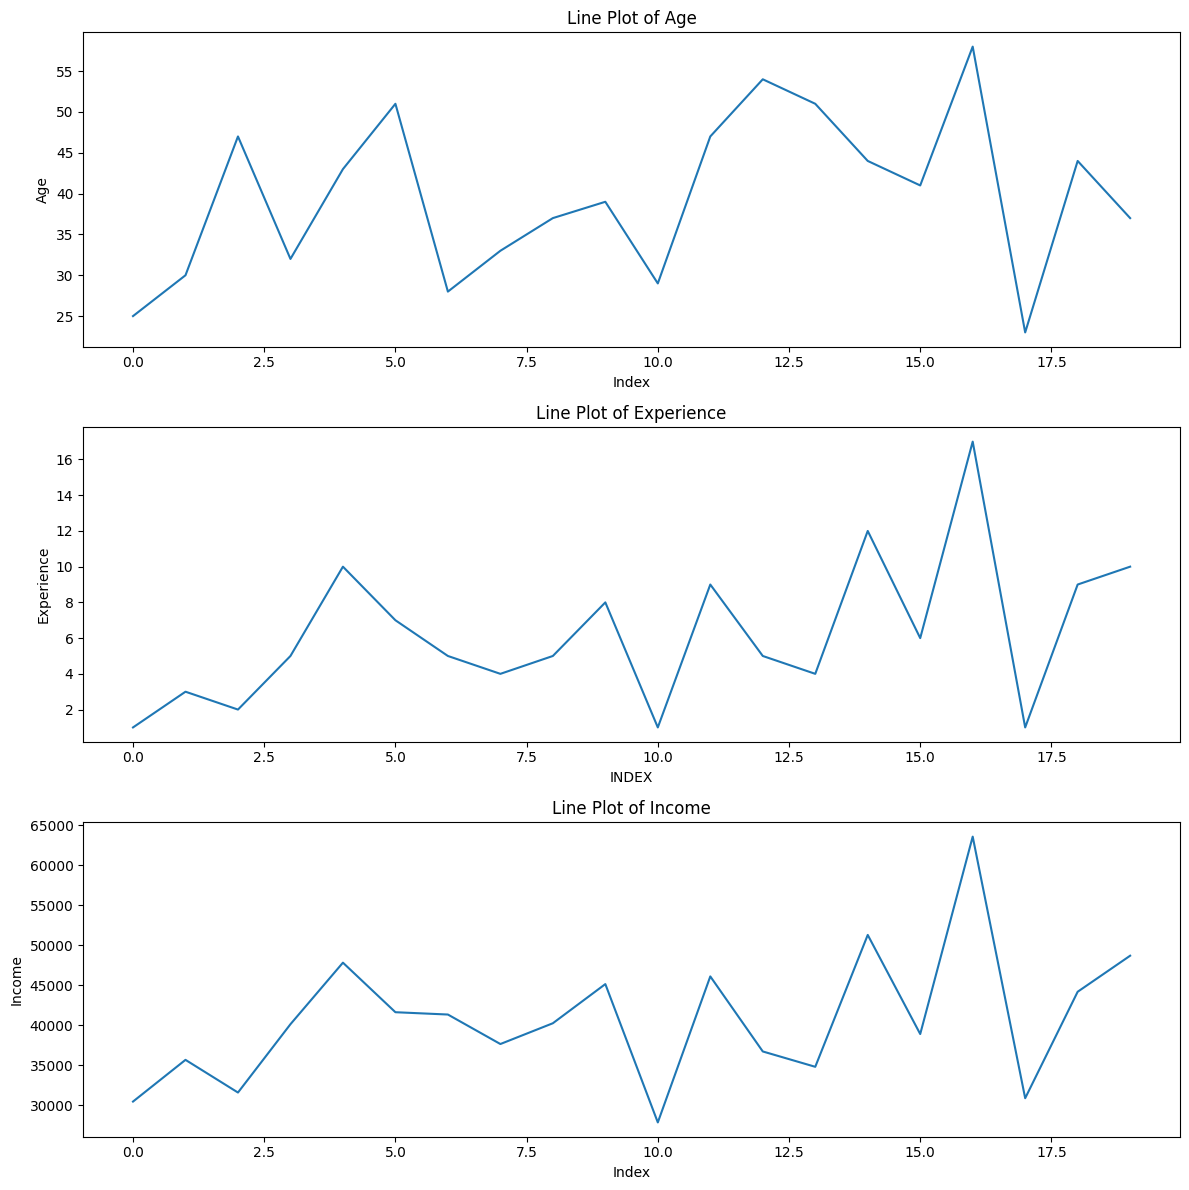

In [ ]:
fig, axes= plt.subplots(3,1, figsize=(12,12))

axes[0].plot(office['age'])
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Age")
axes[0].set_title("Line Plot of Age")

axes[1].plot(office['experience'])
axes[1].set_xlabel("INDEX")
axes[1].set_ylabel("Experience")
axes[1].set_title("Line Plot of Experience")

axes[2].plot(office['income'])
axes[2].set_xlabel("Index")
axes[2].set_ylabel("Income")
axes[2].set_title("Line Plot of Income")
plt.tight_layout()
plt.show()

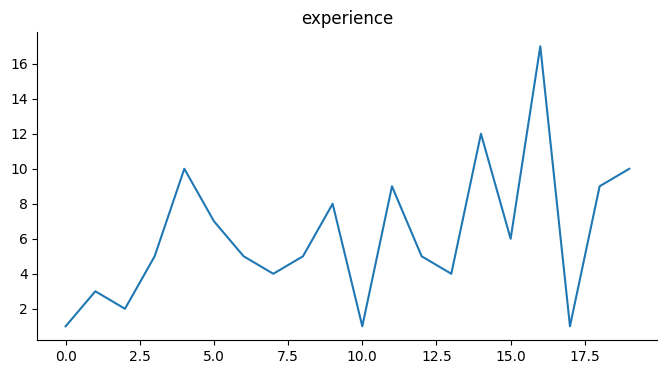

In [ ]:
# @title experience
from matplotlib import pyplot as plt
office['experience'].plot(kind='line', figsize=(8, 4), title='experience')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


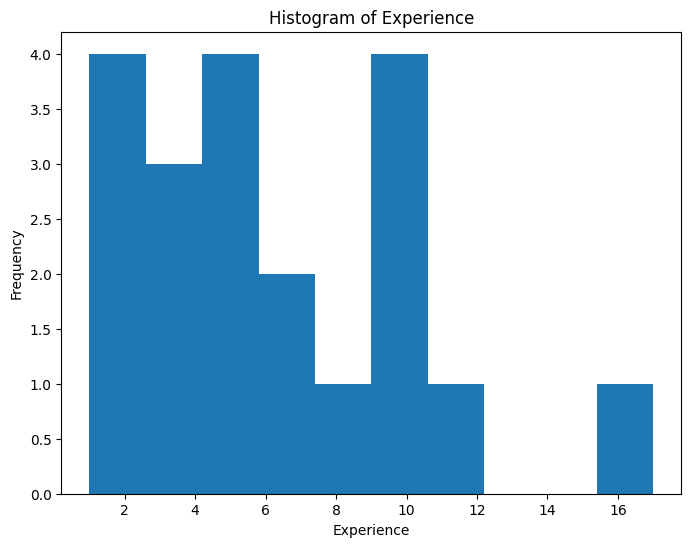

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(office['experience'])
plt.xlabel("Experience")
plt.ylabel("Frequency")
plt.title("Histogram of Experience")
plt.show()

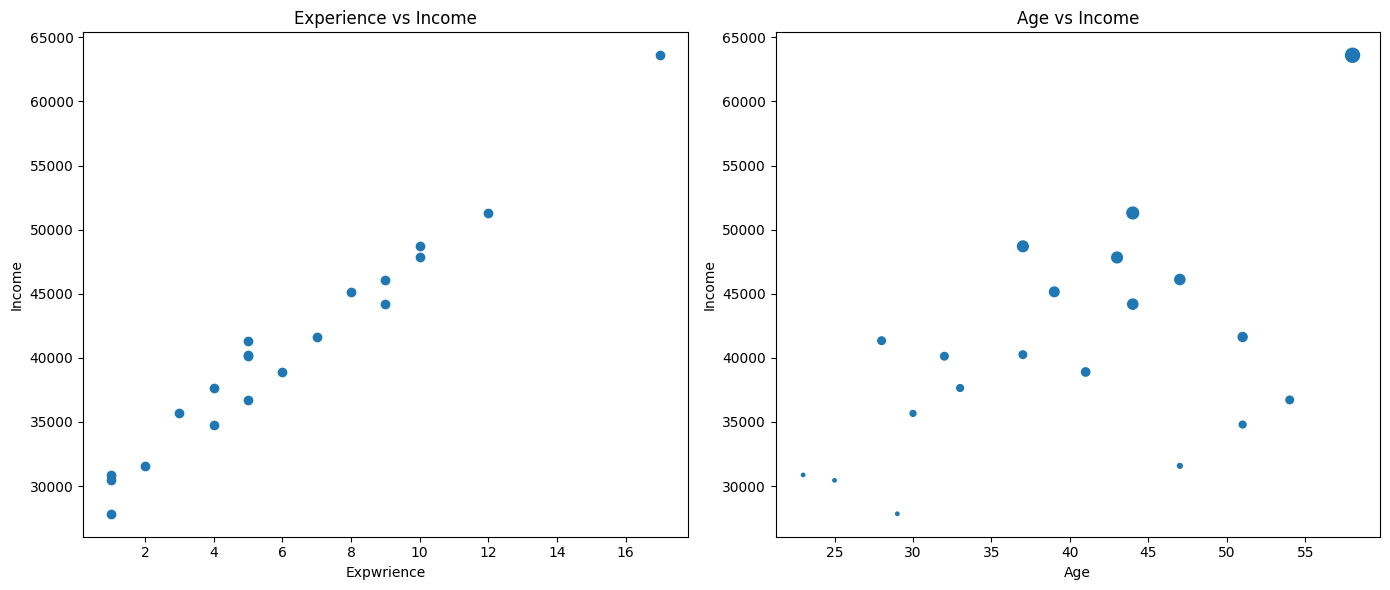

In [ ]:
fig, axes= plt.subplots(1,2, figsize=(14,6))
axes[0].scatter(office['experience'], office['income'])
axes[0].set_xlabel("Expwrience")
axes[0].set_ylabel("Income")
axes[0].set_title("Experience vs Income")

axes[1].scatter(office['age'], office['income'], s= np.array(office['experience']*6))
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Income")
axes[1].set_title("Age vs Income")

plt.tight_layout()


plt.show()

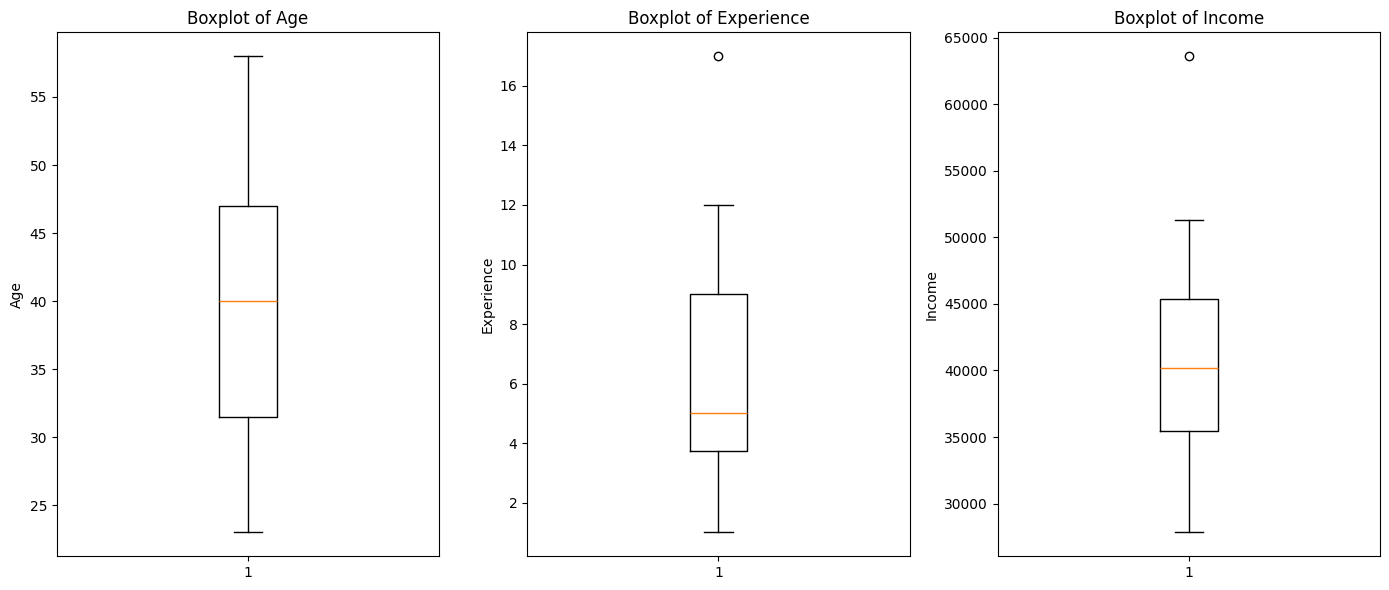

In [ ]:
fig, axes= plt.subplots(1,3, figsize= (14,6))

axes[0].boxplot(office['age'])
axes[0].set_ylabel("Age")
axes[0].set_title("Boxplot of Age")

axes[1].boxplot(office['experience'])
axes[1].set_ylabel("Experience")
axes[1].set_title("Boxplot of Experience")

axes[2].boxplot(office['income'])
axes[2].set_ylabel('Income')
axes[2].set_title("Boxplot of Income")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display
pd.set_option('display.max_columns', None)

In [ ]:
X_simple= office['experience']
y_simple= office['income']

X_simple= sm.add_constant(X_simple)

simple_model= sm.OLS(y_simple, X_simple).fit()
print(simple_model.summary())

Y_PRED= simple_model.predict(X_simple)

ME= np.mean(Y_PRED-y_simple)
print("ME:",ME)

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     557.1
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           5.42e-15
Time:                        14:29:07   Log-Likelihood:                -174.04
No. Observations:                  20   AIC:                             352.1
Df Residuals:                      18   BIC:                             354.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.825e+04    630.509     44.803      0.0

In [ ]:
# ME, RMSE, MAE, MPE, MAPE,

from sklearn.metrics import mean_absolute_percentage_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

target= 'income'
X= office.drop(columns=[target])
y= office[target]

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state=47)

X_train= sm.add_constant(X_train)
X_test= sm.add_constant(X_test)

model= sm.OLS(y_train, X_train).fit()
print(model.summary())

y_pred= model.predict(X_test)
print(y_pred)

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     550.5
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           2.73e-13
Time:                        14:26:55   Log-Likelihood:                -130.77
No. Observations:                  16   AIC:                             267.5
Df Residuals:                      13   BIC:                             269.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.209e+04    955.462     33.587      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


R-squared (R2R2) measures how well the independent variables explain the variability of the dependent variable in a regression model.
In your dataset, the dependent variable is "Income" (Salary). Variability refers to how much salaries differ from each other in your data.

Example:
•	The salaries range from $30,450 to $63,600, showing a large spread.
•	High variability means that Age and Experience may not fully explain salary differences—other factors (like education, job type) could be influencing salaries.

•	The salaries range from $30,000 to $32,000, showing a small spread.
•	Low variability means Age and Experience likely explain most of the salary differences.



How Does R2 Relate to Variability?
•	R2R2 measures how much of this variability in salary is explained by the model.
•	If R2=0.85R2=0.85, then 85% of salary variation is explained by Age and Experience.
•	If R2=0.30R2=0.30, then only 30% of salary variation is explained—meaning other factors influence salary.


####Suppose you want to employee new employees in dad's office, and you want predict the appropriate salaries based on the salaries of current employees.

If a new employees are employeed in dad's office with similar age and experience, there predicted salaries would be following against the actual salaries.
10. 29	1	A=27840, P= 30908.317399. If a person with age 29 and experience of 1 year experience , he will be given 30908 instead of 27840.
14.	44	12	A=51300, P= 53587.082851. If a person with age 44 and experience of 12 year experience, he will be given 53587.082851 instead of 51300.
18.	44	9	A=44190, P= 46921.752376. If a person with age 44 and experience of 9 year experience, he will be given 46921.752376 instead of 44190.
4.	43	10	A=47830, P= 49260.914509. If a person with age 43 and experience of 10 year experience, he will be given 49260.914509 instead of 47830.


ME: 2379.516784039366

2,379.52 (positive) means that, on average, the model overestimates income by 2,379.52 dollars compared to the actual income values.

What it means:

1. model tends to predict income values that are higher than the real values.
2. overestimation suggests a systematic bias in the model, meaning that it frequently predicts higher income than what is actually observed.
3. This could lead to overpaying new hires, which might impact your budget or create salary inequities with existing employees.
4. overestimation of $2,379.52 might indicate that the model does not perfectly capture the true relationship between age, experience, and income. There is something not right like, there might be something wrong between variables such as between income and age, for example, there might be some guy who is young but getting more salary than older people, it might be due to the fact that he has higher level of education. So that education variable is not given in the dataset that's why model cannot capture the relationship between age, education, experience and income. So it is overestimating. Or there might be a girl with normal experience but she is getting higher income due to favors. So that binary variable of favor=1,0 is missing that's why, model cannot capture the relationship between variables.
5. If age and experience are strongly correlated, the model might not capture their separate effects correctly.
6. If the relationship between predictors and income is non-linear, a simple linear regression model might not fit well.


(Is overestimation or underestimation possible because of relation within variables instead of between variables, if YES, then can ANOVA test applied?)

Use ME to check for bias in the model. ME close to zero
suggests that the model doesn’t systematically over- or under-predict.

Systematic bias occurs when there is a flaw in the model, data collection, or experimental design that causes the results to be consistently off in one direction (either too high or too low).


RMSE: 2457.4024400539815

ME can be positive or negative, meaning it can cancel out over- and under-predictions. o	RMSE is always positive, as it penalizes large errors and gives a true measure of prediction accuracy. ME treats all errors equally (simply averaging them). RMSE penalizes larger errors more, making it better for detecting large individual deviations. ME is useful for detecting bias (whether predictions systematically overestimate or underestimate).
RMSE is better for evaluating model accuracy and comparing different models.

•	If ME is close to 0 but RMSE is high, the model makes large errors, but they cancel out when averaged.
•	If RMSE is significantly higher than ME, it suggests large individual prediction errors exist even if the average bias is small.

Large individual prediction errors exist even if the average bias is small

In our case RMSE is higher than ME but only slightly.It implies that:

•	Outliers, •	Missing Features, •	Incorrect Data Entry, •	Irrelevant or weak predictors, Non-linear relationship, and •	Overfitting or underfitting.

If the model is used for salary predictions large individual error or RMSE can lead to wrong business decision such as in our case hiring employee with extra salary becasue of prediction of our model and model predicted based on the individual error (one employee get more salary than others, it biased the model.)

MAE: 2379.516784039366

Giving an indication of the overall prediction error. less sensitive to large errors compared to RMSE.

Model’s predictions are off by $2,379.52, regardless of whether the error is positive or negative. So in our case, we will just assume that employees can get excessive salary by $2,379.52 or less salary by $2,379.52 (it only shows the magnitude of errors- not the direction of erros positive $2,379.52 or negative $2,379.52).

This level of error is acceptable depends on the industry:
o	For example in dad's office for low-income jobs or lower (10-grade-clerks), a $2,380 difference is significant.
o	For example in dad's office for high-income jobs or higher (16/17-grade-officers)high-paying executive roles, this may be a small deviation.

So it is important to plot the graph (Actual vs Predicted values) along with MAE, from that graph it can be determined that if error is only positive or also negative, because MAE only takes absolute values.
Further Analysis or self-analysis: Find the pattern, which values on graph are overestimating or underestimating.

For example: 1,2,3 are underestimating, so it can be found that income of employees with particular age and experience is underestimating, for instance if they are grade-13 employees (lower pay scale jobs).

For example: 4,5,6 are overestimating, so it can be found that income of employees with particular age and experience is overestimating, for instance if they are grade-17 employees (Higher pay scale jobs).

Overall conclusion: People who are already at higher pay scale jobs will get even more richer and people who are at lower pay scale jobs will get even more poorer. Because, model overestimates only for the people who are higher scale whereas it underestimates only for the people who are at lower scale. But since MAE takes only absolute values so it cannot be determined wheather or not there is underestimation with the test data/prediction/even unseen data. (Refer to word document of metrics evaluation).

Note: Using k-FOLD is necessary here, what if other samples don't underestimate.

Further discrepancy between higher pay scaled and lower pay scale can be verified by EDA.

However, in our case it only overestimates, since we found out from the actual vs predicted values graph below.

Next Steps for Improvement
•	Address Model Bias: Since ME is negative, consider adding features that capture missing salary determinants (e.g., industry, job title, education).
•	Improve Model Accuracy: Reduce MAE by using advanced techniques like feature engineering, non-linear models (e.g., Random Forests, Neural Networks), or hyperparameter tuning.
•	Business Adjustments: If used for hiring, the company may need to increase predicted salary offers slightly to avoid underpayment.


MPE: 6.163251856717732%

If MPE = +5%, the model overpredicts salaries by 5%, which could lead to overbudgeting for payroll costs or inflated salary expectations in hiring.

How This Affects Business Decisions:

•	Salary Forecasting: HR departments might set salary expectations higher than market standards.
•	Hiring Impact: Candidates might receive unnecessary higher offers.

•	This allows the boss to understand the bias in percentage terms, making it easier to compare across salary bands.

MAPE: 6.163251856717732%

If MAPE = 6.5%, it means that, on average, the model’s predictions are 6.5% off from actual values.

Easy to interpret – A MAPE of 6.5% means that, on average, salary predictions are 6.5% away from actual salaries, whether higher or lower.

Useful when evaluating multiple models or forecasting errors across different salary levels becasue there is no minus(negative) or plus(positive).


MSE: 6038826.752383262



#Best Way to Present MAPE to the Boss
•	If the boss wants dollar figures: Use MAE (e.g., "$2,380 off on average").
•	If the boss wants percentage-based comparisons: Use MAPE (e.g., "Salary predictions are, on average, 6.5% away from actual values").
•	If the boss wants to know model bias: Use MPE (e.g., "Our model systematically underestimates salaries by 6.16%").




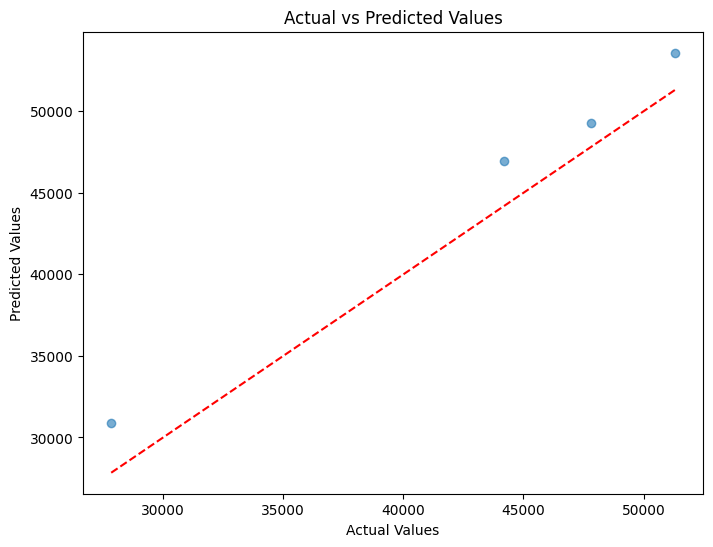

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ME (BIAS)
ME= np.mean(y_pred-y_test)

#RMSE
RMSE= np.sqrt(mean_squared_error(y_test, y_pred))

#MAE
MAE= mean_absolute_error(y_test, y_pred)

#MPE
MPE= np.mean((y_pred-y_test)/y_test)*100

#MAPE
MAPE= np.mean(np.abs((y_pred-y_test)/y_test))*100

#MSE
MSE= mean_squared_error(y_test, y_pred)

print(f"ME: {ME}")
print(f"RMSE: {RMSE}")
print(f"MAE: {MAE}")
print(f"MPE: {MPE}%")
print(f"MAPE: {MAPE}%")
print(f"MSE: {MSE}")

ME: 2379.516784039366
RMSE: 2457.4024400539815
MAE: 2379.516784039366
MPE: 6.163251856717732%
MAPE: 6.163251856717732%
MSE: 6038826.752383262


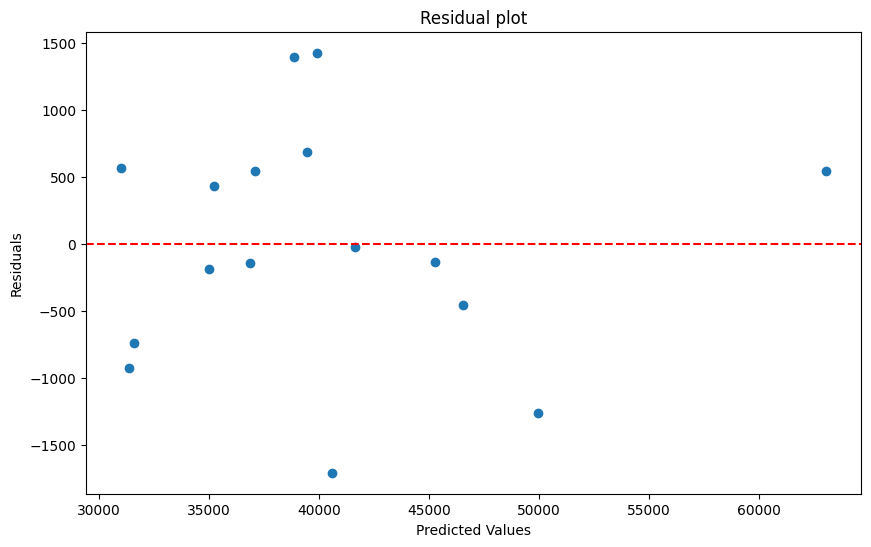

In [ ]:
residuals= model.resid
plt.figure(figsize=(10,6))
plt.scatter(model.predict(), residuals)
plt.axhline(y=0, color= 'r', linestyle= '--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()


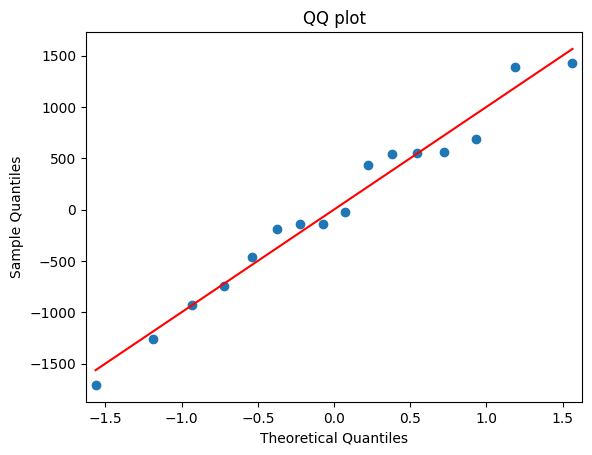

In [ ]:
sm.qqplot(model.resid, line='r')
plt.title("QQ plot")
plt.show()

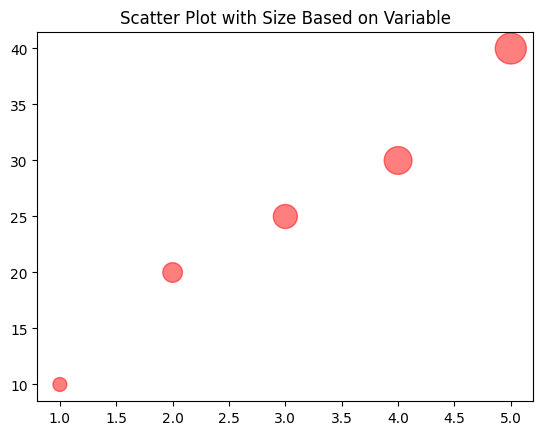

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 40]

z = [1, 2, 3, 4, 5]  # Let's assume z represents some importance factor
sizes = [i * 100 for i in z]  # Scale the sizes accordingly

plt.scatter(x, y, s=sizes, c="red", alpha=0.5)  # Semi-transparent red markers
plt.title("Scatter Plot with Size Based on Variable")
plt.show()
